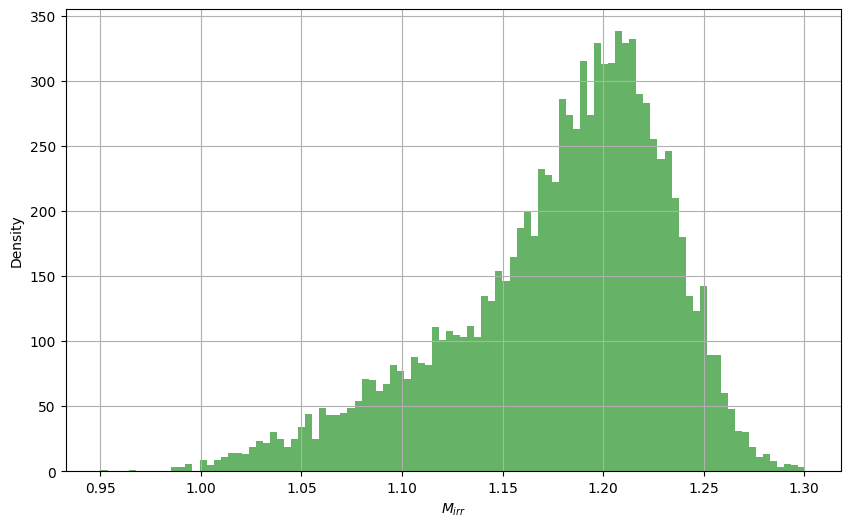

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import random

def f(spin): 
    return np.sqrt(1 + np.sqrt(1 - spin**2) / 2)

def M_irr(spin, mass):
    return mass * f(spin)

n_samples = 10000
mu = 1
sigma = 0.02
m_irr_values = []

for _ in range(n_samples):
    spin = random.uniform(0, 1)
    mass = random.gauss(mu, sigma)
    m_irr_values.append(M_irr(spin, mass))  

# plot histogram
plt.figure(figsize=(10, 6))
plt.hist(m_irr_values, bins=100, alpha=0.6, color='g')
plt.xlabel(r'$M_{irr}$')
plt.ylabel('Density')
plt.grid()
plt.show()


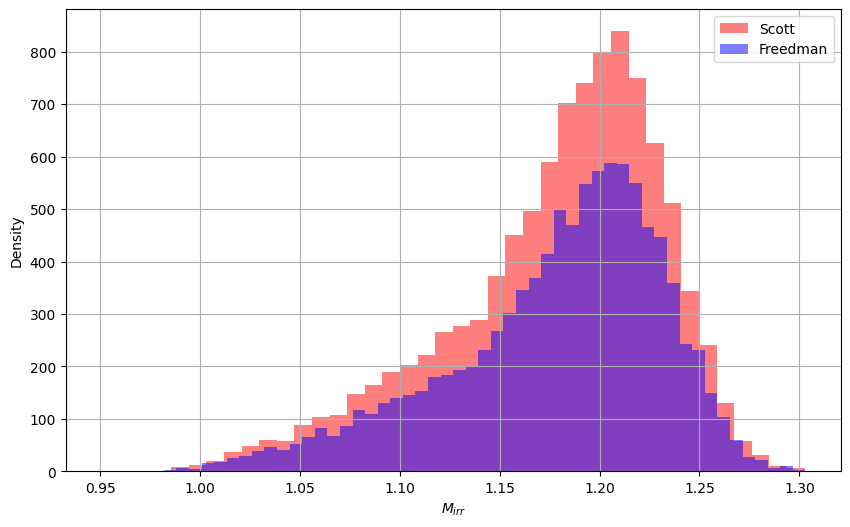

In [16]:
from astropy.visualization.hist import hist

plt.figure(figsize=(10, 6))
_ = hist(m_irr_values, bins="scott", alpha=0.5, color="red", label="Scott")
_ = hist(m_irr_values, bins="freedman", alpha=0.5, color="blue", label="Freedman")

plt.xlabel(r'$M_{irr}$')
plt.ylabel('Density')
plt.grid()
plt.legend()
plt.show()



21


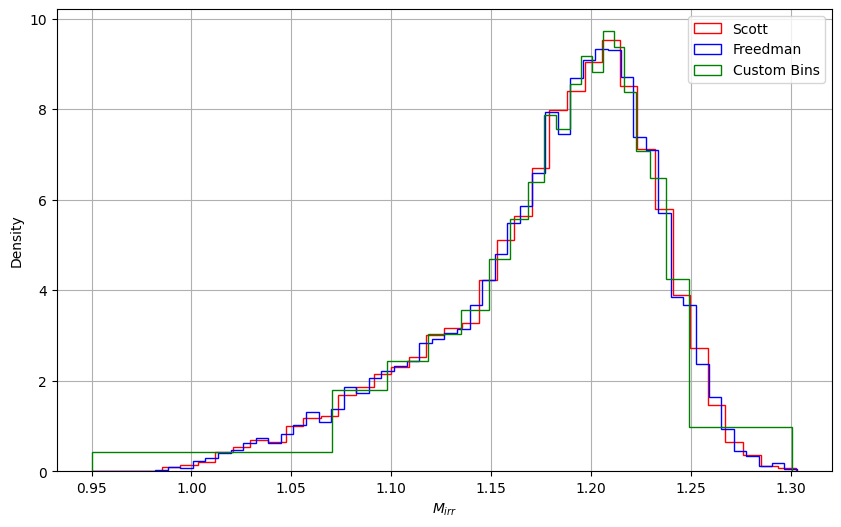

In [17]:
plt.figure(figsize=(10, 6))
# Use astropy's hist for all three histograms
_ = hist(m_irr_values, bins="scott",  histtype="step", density=True, color="red", label="Scott")
_ = hist(m_irr_values, bins="freedman",  histtype="step", density=True, color="blue", label="Freedman")

# Make sure you have enough bins (maybe use a different stride)
custom_bins = np.append(np.sort(m_irr_values)[::500], np.max(m_irr_values)) 
print(len(custom_bins))

# Use the same hist function for consistency
_ = hist(m_irr_values, bins=custom_bins,  histtype="step", density=True, color="green", label="Custom Bins")

plt.xlabel(r'$M_{irr}$')
plt.ylabel('Density')
plt.grid()
plt.legend()
plt.show()


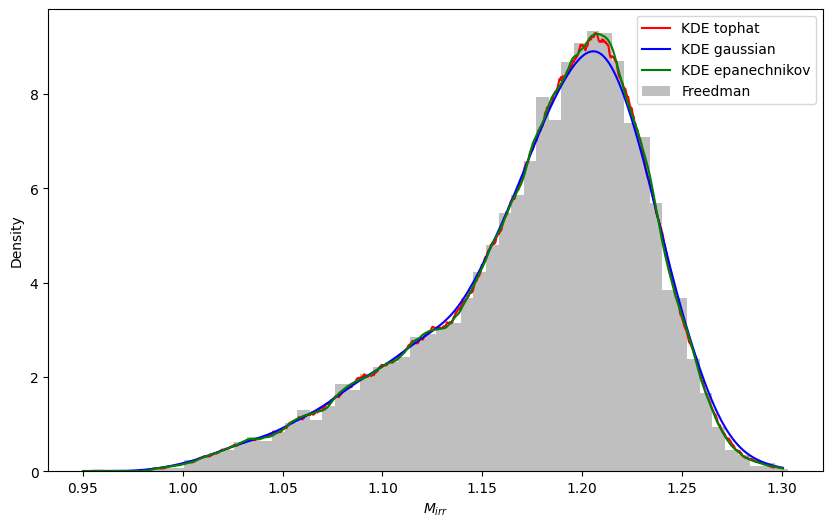

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

def kd_function(data, eval_points, bandwidth, kernel):
    kde = KernelDensity(kernel=kernel, bandwidth=bandwidth) # data in 2D as input
    kde.fit(data[:, np.newaxis])
    log_density = kde.score_samples(eval_points[:, np.newaxis])
    return np.exp(log_density)

m_irr_values = np.array(m_irr_values)
# Create evaluation points evenly spaced across the range of your data
x_plot = np.linspace(m_irr_values.min(), m_irr_values.max(), 1000)

pdf_tophat = kd_function(m_irr_values, x_plot, 0.01, "tophat")
pdf_gaussian = kd_function(m_irr_values, x_plot, 0.01, "gaussian")
pdf_epanechnikov = kd_function(m_irr_values, x_plot, 0.01, "epanechnikov")

plt.figure(figsize=(10, 6))

plt.plot(x_plot.ravel(), pdf_tophat, color="red", label="KDE tophat")
plt.plot(x_plot.ravel(), pdf_gaussian, color="blue", label="KDE gaussian")
plt.plot(x_plot.ravel(), pdf_epanechnikov, color="green", label="KDE epanechnikov")
_ = hist(m_irr_values, bins="freedman", alpha=0.5, density=True, color="gray", label="Freedman")

plt.xlabel(r'$M_{irr}$')
plt.ylabel('Density')
plt.legend()
plt.show()

/mnt/c/Users/User/Desktop/info/myenv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:394: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  return hypotest_fun_in(*args, **kwds)


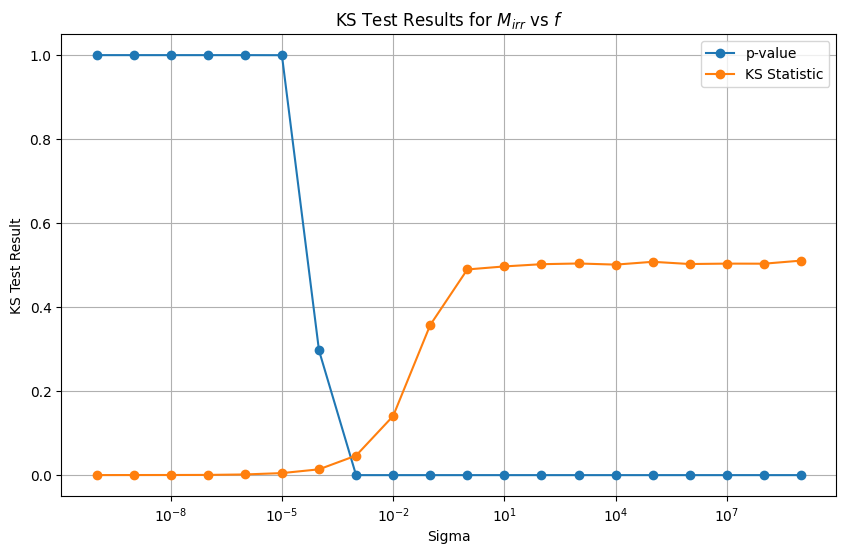

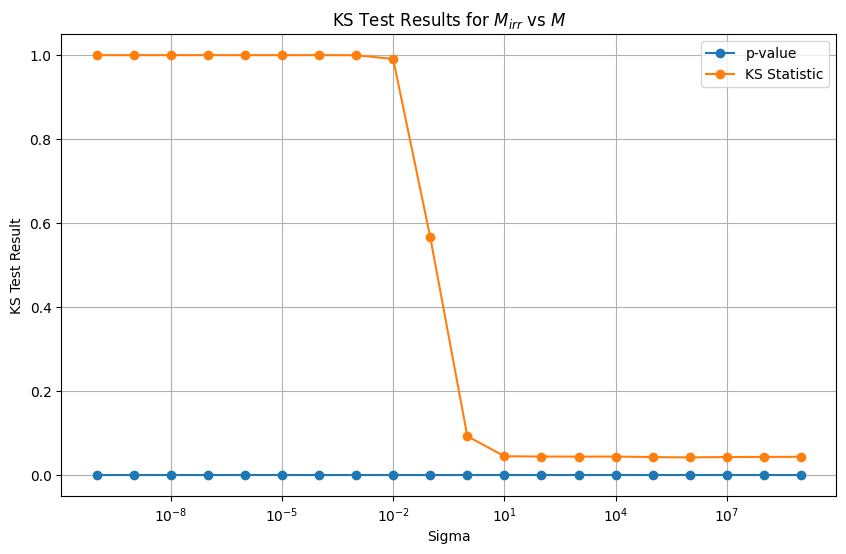

In [19]:
from scipy.stats import kstest
from scipy.stats import norm

sigmas = [10 ** i for i in range(-10, 10)]
ks_results_mir_f = {"p_value": [], "ks_statistic": []}
ks_results_mir_m = {"p_value": [], "ks_statistic": []}

for sigma in sigmas:
    mir = []
    m = []
    f_vec = []
    for _ in range(n_samples):
        spin = random.uniform(0, 1)
        mass = random.gauss(mu, sigma)
        mir.append(M_irr(spin, mass))
        f_vec.append(f(spin))
        m.append(mass)
    
    # Perform the Kolmogorov-Smirnov test
    ks_statistic, p_value = kstest(f_vec, mir)
    ks_results_mir_f["p_value"].append(p_value)
    ks_results_mir_f["ks_statistic"].append(ks_statistic)

    ks_statistic, p_value = kstest(m, mir)
    ks_results_mir_m["p_value"].append(p_value)
    ks_results_mir_m["ks_statistic"].append(ks_statistic)

plt.figure(figsize=(10, 6))
plt.plot(sigmas, ks_results_mir_f["p_value"], marker='o', label='p-value')
plt.plot(sigmas, ks_results_mir_f["ks_statistic"], marker='o', label='KS Statistic')
plt.title(r'KS Test Results for $M_{irr}$ vs $f$')
plt.xlabel('Sigma')
plt.ylabel('KS Test Result')
plt.xscale('log')
plt.grid()
plt.legend()
plt.show()
plt.close()

plt.figure(figsize=(10, 6))
plt.plot(sigmas, ks_results_mir_m["p_value"], marker='o', label='p-value')
plt.plot(sigmas, ks_results_mir_m["ks_statistic"], marker='o', label='KS Statistic')
plt.title(r'KS Test Results for $M_{irr}$ vs $M$')
plt.xlabel('Sigma')
plt.ylabel('KS Test Result')
plt.xscale('log')
plt.grid()
plt.legend()
plt.show()

- Un KS statistic basso (idealmente vicino a 0) e
- Un p-value alto (maggiore del livello di significatività scelto, ad esempio 0.05).

/tmp/ipykernel_10194/3475368358.py:2: RuntimeWarning: invalid value encountered in sqrt
  return 2 * (2 * f(spin)**2 - 1) / np.sqrt(1 - f(spin)**2)
/mnt/c/Users/User/Desktop/info/myenv/lib/python3.11/site-packages/matplotlib/axes/_axes.py:6834: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/mnt/c/Users/User/Desktop/info/myenv/lib/python3.11/site-packages/matplotlib/axes/_axes.py:6835: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

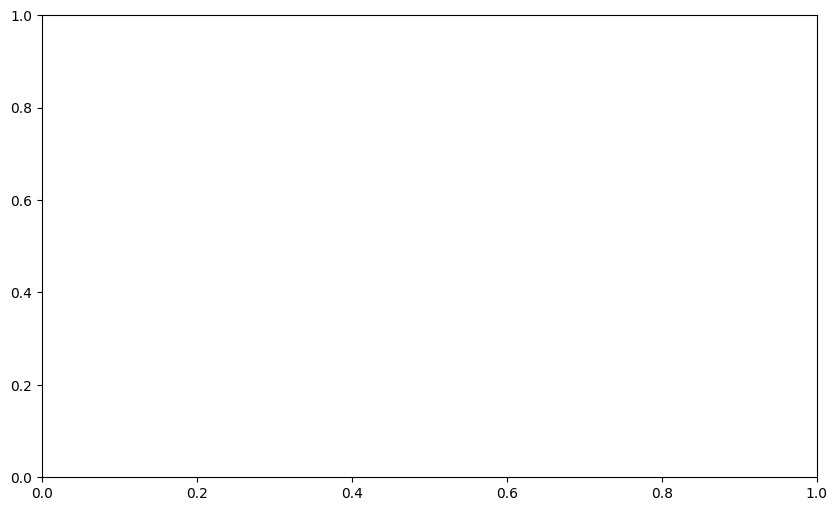

In [ ]:
def pi(spin):
    return 2 * (2 * f(spin)**2 - 1) / np.sqrt(1 - f(spin)**2)

pi_values = []
for _ in range(n_samples):
    spin = random.uniform(0, 1)
    pi_values.append(pi(spin))